## Name : Snehal Shyam Jagtap

### DECISION TREE
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

## Step 1 :Data Preparation

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

In [20]:
data = pd.read_csv("heart_disease.csv")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [22]:
data.shape

(908, 13)

In [23]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [24]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [25]:
data['sex'] = data['sex'].replace({'Male': 1, 'Female': 0})
data['cp'] = data['cp'].replace({
    'typical angina': 1,
    'atypical angina': 2,
    'non-anginal': 3,
    'asymptomatic': 4
})

In [26]:
data['restecg'] = data['restecg'].replace({'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2})
data['slope'] = data['slope'].replace({'upsloping': 1, 'flat': 0, 'downsloping': 2})
data['thal'] = data['thal'].replace({'normal': 1, 'fixed defect': 2, 'reversable defect': 3})
data['exang'] = data['exang'].replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1})  # Fix any inconsistencies

In [27]:
X = data.drop(columns=['num'])
y = data['num']

In [28]:
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [29]:
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [32]:
y_pred = dt_model.predict(X_test)

In [33]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {f1:.2f}")

Confusion Matrix:
 [[65 13  6  4  1]
 [17 18  7  6  0]
 [ 5  4  7  5  1]
 [ 2 11  1  1  2]
 [ 0  4  2  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        89
           1       0.36      0.38      0.37        48
           2       0.30      0.32      0.31        22
           3       0.06      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.29      0.30      0.29       182
weighted avg       0.49      0.50      0.50       182

Macro F1 Score: 0.29


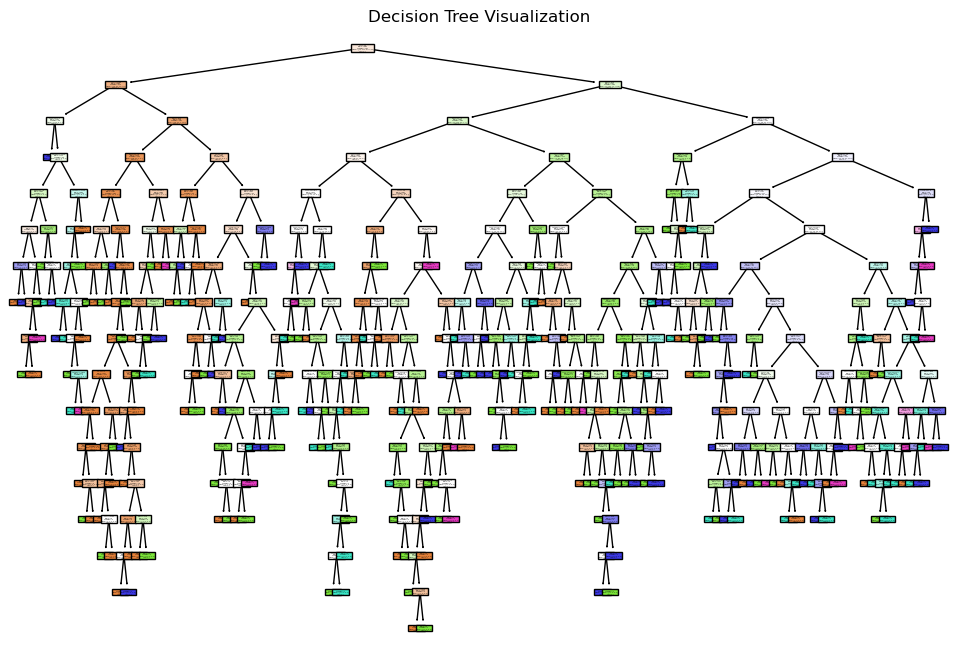

In [34]:
# Visualize the Decision Tree structure
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model, 
    filled=True, 
    feature_names=data.drop(columns=['num']).columns, 
    class_names=[str(cls) for cls in y.unique()]
)
plt.title("Decision Tree Visualization")
plt.show()

## Interview Questions and Answers

## **1. What are some common hyperparameters of decision tree models, and how do they affect the model performance?**

# Common Hyperparameters of Decision Tree Models

1. **`max_depth`**:
   - Specifies the maximum depth of the tree.
   - A smaller depth prevents overfitting by limiting the complexity of the tree, but it might underfit the data.

2. **`min_samples_split`**:
   - The minimum number of samples required to split an internal node.
   - Higher values prevent the model from creating very small splits, thus controlling overfitting.

3. **`min_samples_leaf`**:
   - The minimum number of samples that a leaf node must have.
   - Larger values result in a more generalized tree by ensuring sufficient samples in each leaf.

4. **`criterion`**:
   - Determines the function to measure the quality of a split.
     - Common values:
       - `gini` (Gini Impurity)
       - `entropy` (Information Gain)
   - Choosing the right criterion affects how splits are evaluated.

5. **`max_features`**:
   - The number of features to consider when looking for the best split.
   - Reducing features can speed up the model and help with generalization.

6. **`splitter`**:
   - Strategy used to split nodes.
     - Common values:
       - `best`: Finds the best split.
       - `random`: Randomly selects features for splitting.
   - The `random` option can be useful for creating diverse trees in ensemble methods like Random Forests.

# Impact on Model Performance
- **Overfitting**: A model with very deep trees (`max_depth=None`) or small leaf sizes can memorize the training data and fail to generalize.
- **Underfitting**: Shallow trees or overly restrictive splits can fail to capture the patterns in the data.
- **Generalization**: Properly tuned hyperparameters balance complexity and accuracy, ensuring the model performs well on unseen data.


## **2. What is the difference between Label Encoding and One-hot Encoding?**

# Difference Between Label Encoding and One-hot Encoding

1. **Label Encoding**:
   - Converts categorical values into numerical values by assigning a unique integer to each category.
   - Example:
     ```
     Categories: ['Red', 'Green', 'Blue']
     Encoded: [0, 1, 2]
     ```
   - **Use Case**: Suitable for ordinal data where the categories have an inherent order (e.g., `Low`, `Medium`, `High`).

   - **Advantages**:
     - Simple and memory-efficient.
     - Does not increase the dimensionality of the dataset.

   - **Disadvantages**:
     - May introduce an implicit ordinal relationship between categories, which might not be suitable for nominal data.

2. **One-hot Encoding**:
   - Converts categories into binary vectors where each category is represented as a separate column with 0s and a single 1 indicating the presence of that category.
   - Example:
     ```
     Categories: ['Red', 'Green', 'Blue']
     Encoded:
     Red    Green   Blue
     1      0       0
     0      1       0
     0      0       1
     ```
   - **Use Case**: Suitable for nominal data where categories have no inherent order (e.g., `Red`, `Green`, `Blue`).

   - **Advantages**:
     - Avoids implicit ordinal relationships.
     - Ideal for machine learning algorithms that perform poorly with categorical integers.

   - **Disadvantages**:
     - Increases the dimensionality of the dataset, leading to potential memory and computational issues for datasets with high cardinality.

# Key Considerations
- **Label Encoding**: Use when the algorithm can interpret ordinal relationships (e.g., Decision Trees, XGBoost).
- **One-hot Encoding**: Preferred for nominal data or algorithms like Logistic Regression and Neural Networks that interpret integer values as rankings.
